In [57]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [58]:
df = pd.DataFrame(columns=["N Decoder", "Disentangle Score", "Ablation Type"])

type_to_Type = {
    "decoders": "Original",
    "no_src": "No Source Cross Attention",
    "no_base": "No Base Cross Attention",
    "no_both": "No Source and Base Cross Attention",
}

for ablation_type in ["decoders", "no_src", "no_base", "no_both"]:
    df.loc[len(df)] = [0, 0.31, type_to_Type[ablation_type]]

for n_decoder in [2, 4, 6, 8, 10]:
    for ablation_type in ["decoders", "no_src", "no_base", "no_both"]:
        path = f"./results/decoder_block_ablation/{n_decoder}_{ablation_type}/final_result.json"
        if not os.path.exists(path):
            continue

        with open(path) as f:
            data = json.load(f)
            df.loc[len(df)] = [
                n_decoder,
                data["default"]["accs"]["disentangle"],
                type_to_Type[ablation_type],
            ]

df

,N Decoder,Disentangle Score,Ablation Type
0,0,0.310000,Original
1,0,0.310000,No Source Cross Attention
2,0,0.310000,No Base Cross Attention
3,0,0.310000,No Source and Base Cross Attention
4,2,0.745343,Original
5,2,0.607945,No Source Cross Attention
6,2,0.657277,No Source and Base Cross Attention
7,4,0.779853,Original
8,4,0.639348,No Base Cross Attention
9,6,0.817696,Original


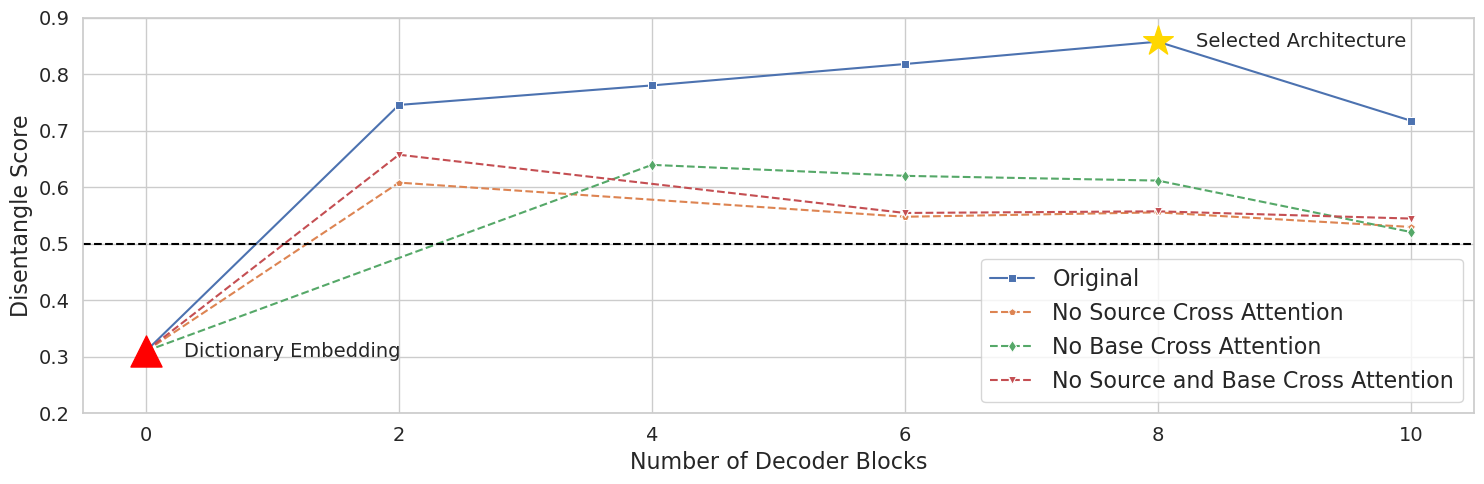

In [59]:
import itertools

fig, ax = plt.subplots(figsize=(15, 5))

marker = itertools.cycle(["o", "^", "*", "8", "s", "p", "d", "v"])
markers = [next(marker) for _ in range(4)]

style = "dashed"

sns.set_theme(style="whitegrid")

for ablation_type in [
    "Original",
    "No Source Cross Attention",
    "No Base Cross Attention",
    "No Source and Base Cross Attention",
]:
    style = "solid" if ablation_type == "Original" else "dashed"
    sns.lineplot(
        data=df[df["Ablation Type"] == ablation_type],
        x="N Decoder",
        y="Disentangle Score",
        label=ablation_type,
        ax=ax,
        marker=next(marker),
        linestyle=style,
    )

plt.scatter(0, 0.31, s=500, marker="^", color="red", zorder=3)
plt.ylim(0.2, 0.9)
plt.annotate("Dictionary Embedding", (0.0 + 0.3, 0.31 - 0.01), size=14)
plt.axhline(y=0.5, color="black", linestyle="--")
# Move the legend to the bottom right
plt.legend(loc="lower right", fontsize=16)

plt.xlabel("Number of Decoder Blocks", fontsize=16)
plt.ylabel("Disentangle Score", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.scatter(8, 0.858, s=500, marker="*", color="gold", zorder=3)
plt.annotate("Selected Architecture", (8.0 + 0.3, 0.858 - 0.01), size=14)

fig.tight_layout()
plt.savefig("decoder_block_ablation.pdf")